### Description

This project contains following sub-folders and scripts:
- analysis, that contains functions for ANN analysis,
- generated/models, where you should paste your downloaded states of the MLP and CNN networks for specific datasets,
- generated/tsne, where t-sne arrays will be saved
- network/constants.py, where you should specify paths to folders described above,
- network/data_loader.py, which define helper loader methods,
- network/network.py, which defines the simple networks architecture

Paper attached to lab materials is an overview of what we will do in this assignment.

In [1]:
from analysis.network_analysis import *

from network.constants import DataType

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## INTER-LAYER EVOLUTION

The bundled image summarizes a sequence of `N` projections, one per hidden layer, shown as thumbnails. For MLP `N=4`, and for CNN `N=2`, Trail hues encode classes, and edge brightness encodes layer number (depth). Thus, the brightness gradient shows how activation data “flow” through the four network layers. The same idea, but slightly modified, can be employed to visualize "inter-epoch" evolution.

TODO: Use `show_seq_projections` function to calculate points and targets for `N` layers of mnist_mlp model. Use `inter_layer_evolution()` and `show_trace()` for plotting the actual evolution between layers.

IMPORTANT: You need to implement minor detail in `show_seq_projections`

313/313 [==============================] - 2s 5ms/step
(2000, 1000)


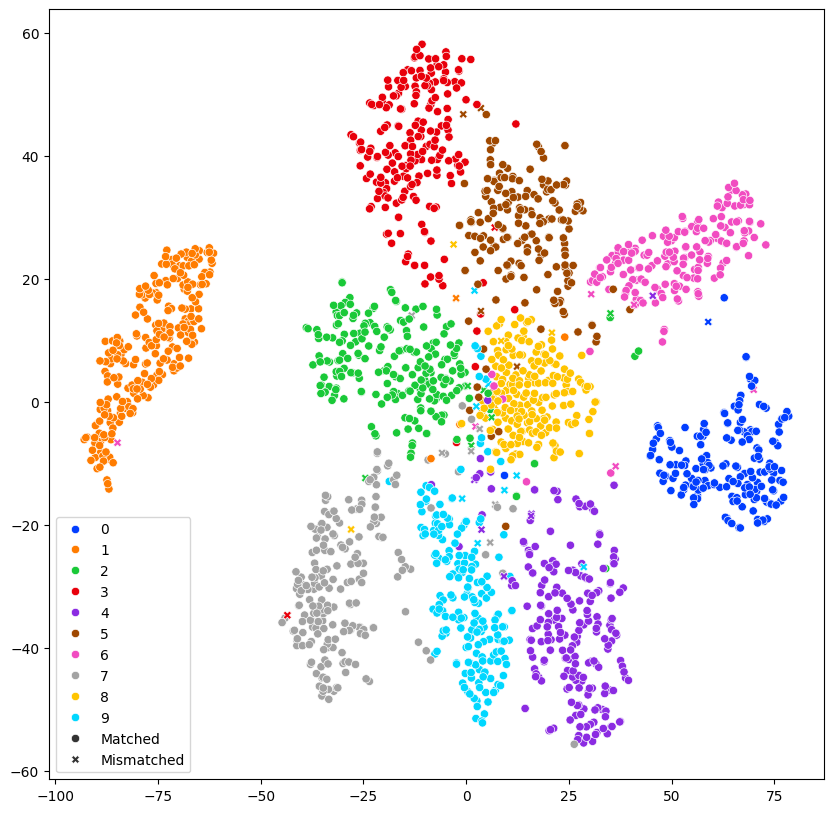

313/313 [==============================] - 3s 8ms/step
(2000, 1000)


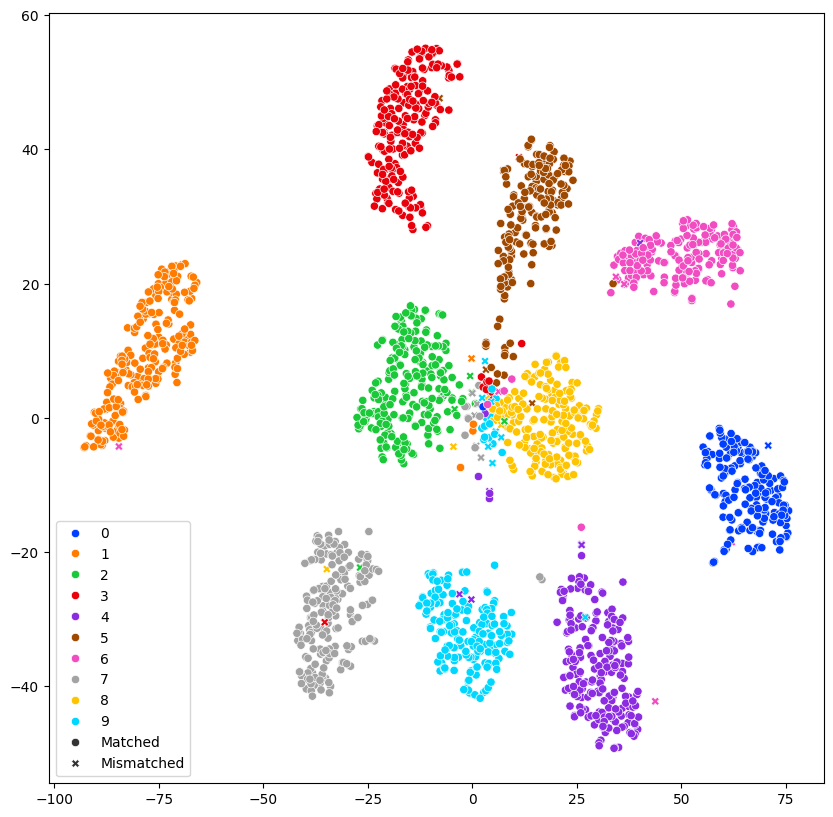

313/313 [==============================] - 3s 8ms/step
(2000, 1000)


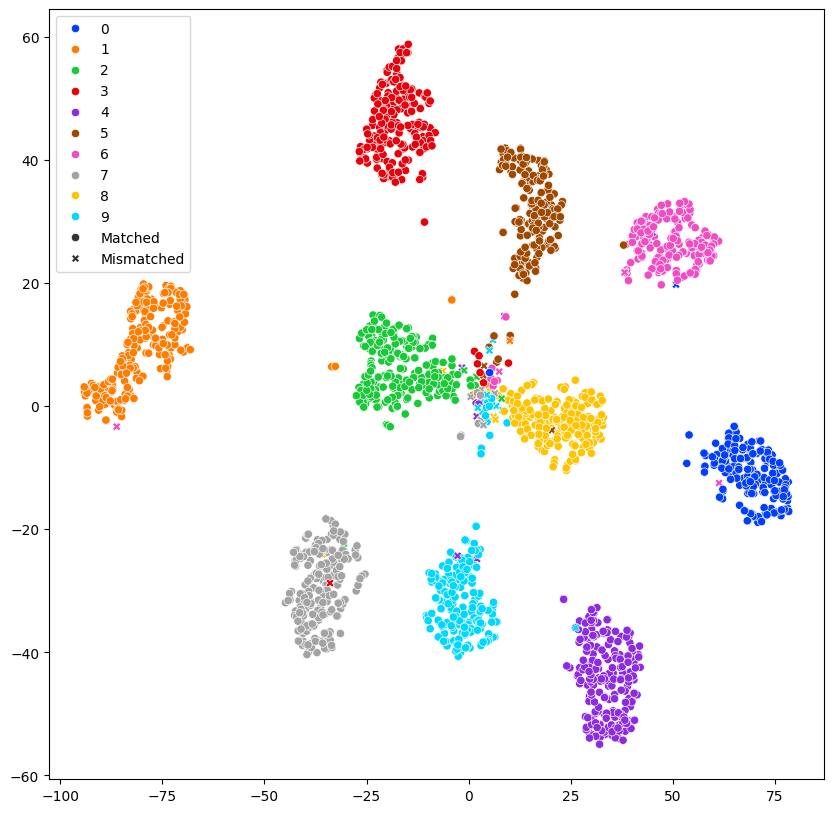

313/313 [==============================] - 3s 10ms/step
(2000, 1000)


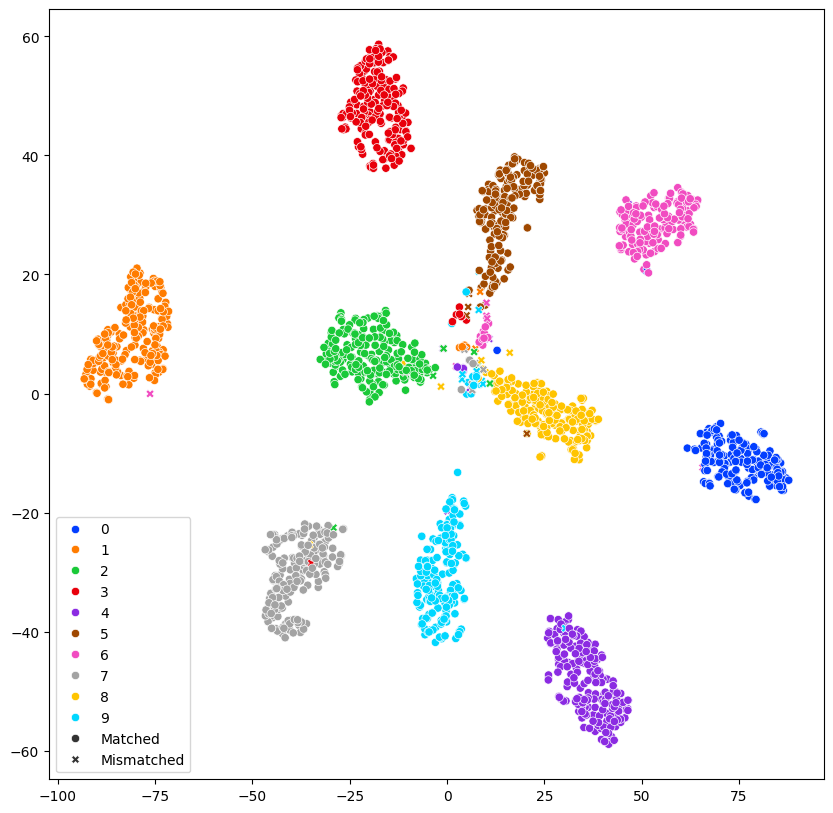

In [2]:
points_transformed = []
targets = []
for i in range(4):
    p, t = show_seq_projections(DataType.MNIST, "mnist_mlp", i, 100, 2000)
    points_transformed.append(p)
    targets.append(t)

We can see a great similarity between 2, 5 and 8 digits even after the last layer. It's not surprising as these numbers can be similar. 

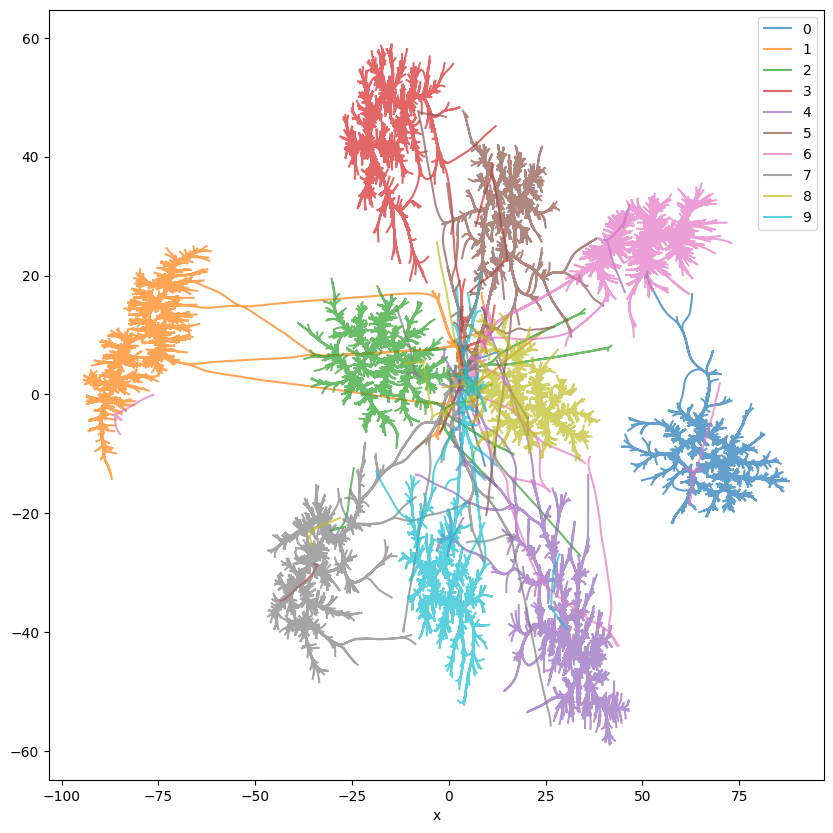

In [3]:
inter_layer_evolution(points_transformed, targets[0])

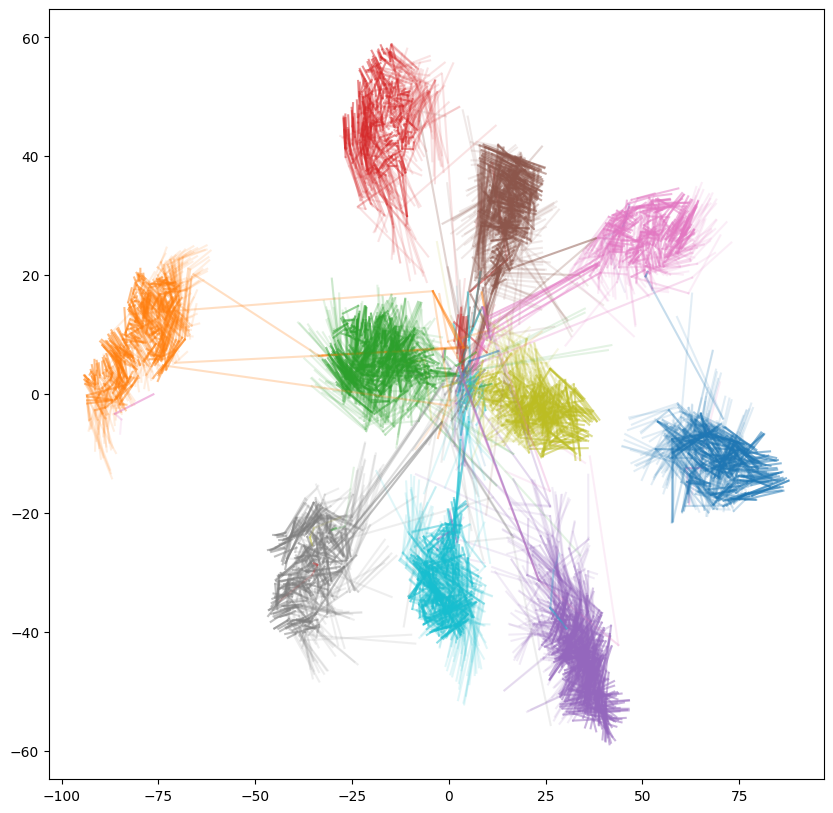

In [4]:
show_trace(points_transformed, targets[0])

The two visualizations above don't seem to be holding much meaning. The spaces of the few layers are computed independently from each other so their scope as well as position don't depend on previous or next layer. We're just connecting them.

TODO: Please repeat the previous task for `mnist_cnn` and compare the two. Additionally, using the provided article, try to determine the meaning behind the results.

In [6]:
# can't do this task without the model files

points_transformed, targets = show_seq_projections(
    DataType.MNIST, "mnist_cnn", 1, 100, 2000
)

OSError: Unable to synchronously open file (file signature not found)

In [ ]:
# inter_layer_evolution(points_transformed, targets[0])

In [ ]:
# show_trace(points_transformed, targets[0])

## INTER-EPOCH EVOLUTION
TODO: To complete this task, start by obtaining points and targets after hidden layers using the `get_all_activations` and `process_activations` functions. Then, use analogous functions for generating the inter-epoch evolution plot and trace. Finally, perform this task for both the `mnist_mlp` and `mnist_cnn` networks.


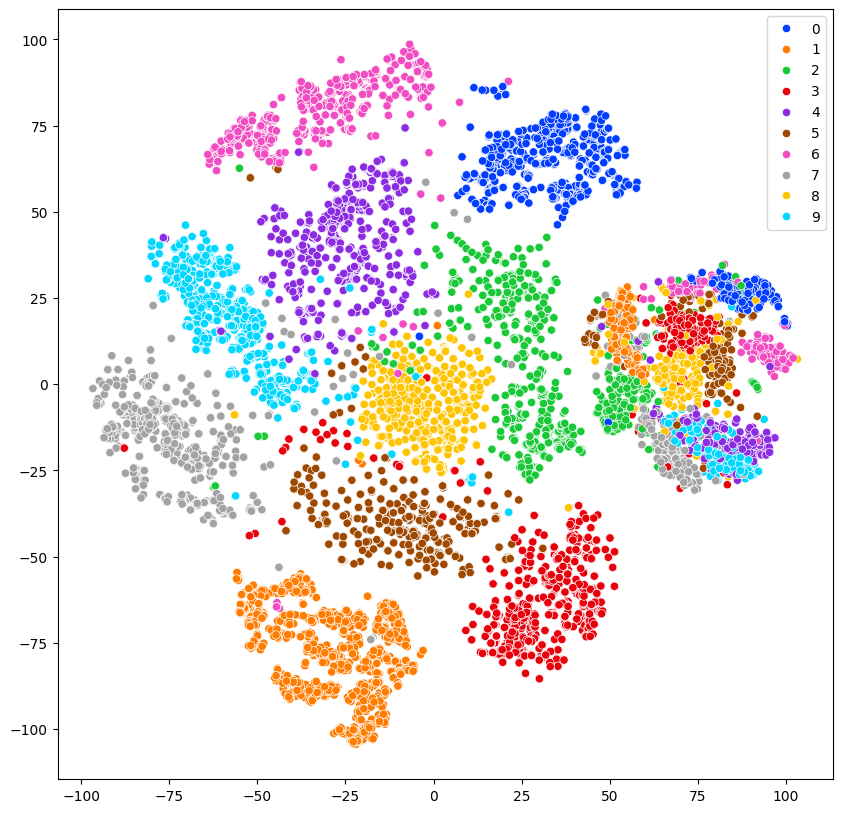

In [7]:
activations, t = get_all_activations(DataType.MNIST, "mnist_mlp", 1, 2000)

points, t = process_activations(activations, t, 2000)

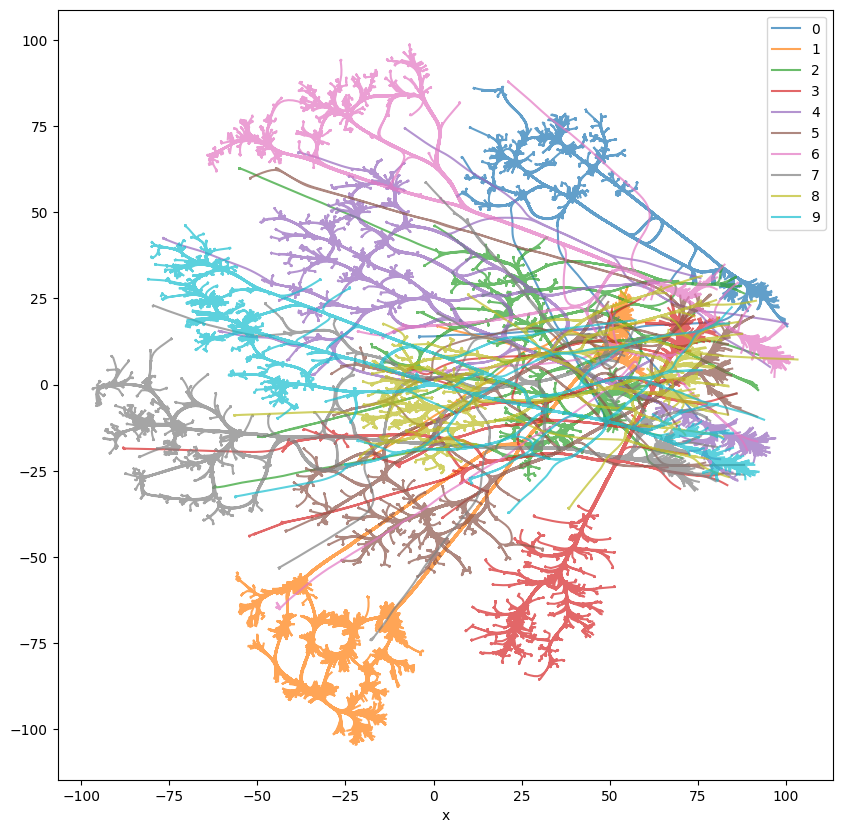

In [8]:
inter_layer_evolution(points, t)

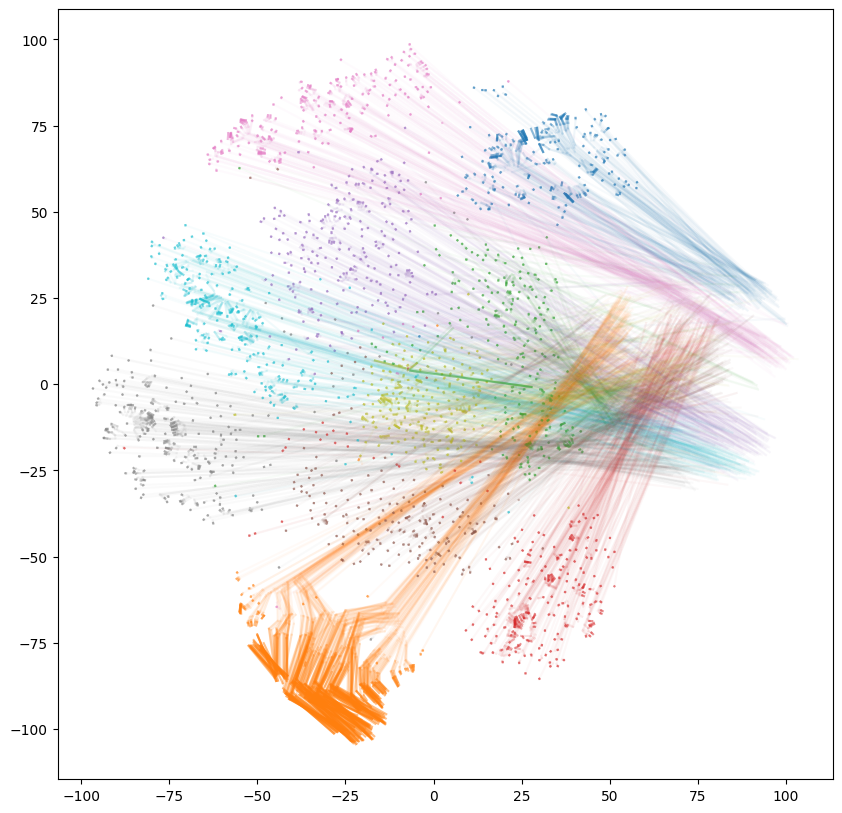

In [9]:
show_trace(points, t)

We can see that the spaces of scores seems to be growing. This allows for better distinction between classes

## PROJECTION COMPARISION

This exercise shows the neuron projection for the last CNN/MLP hidden layer activations, after training. Ignoring the colors for a moment, we see no clear pattern in the neuron projection, except for some ill-defined visual clusters. We next color each point (neuron) based on its ability to discriminate between specified class (here we define class 0) and all other classes, computed by a standard feature selection technique, based on extremely randomized trees.

TODO: Utilize the `compare_projections` method to generate a projection for both `mnist_mlp` and `mnist_cnn`, focusing on different labels (e.g., 0 and 5). IMPORTANT: Few things in `compare_projections` needs to be implemented.

What observations can be made?

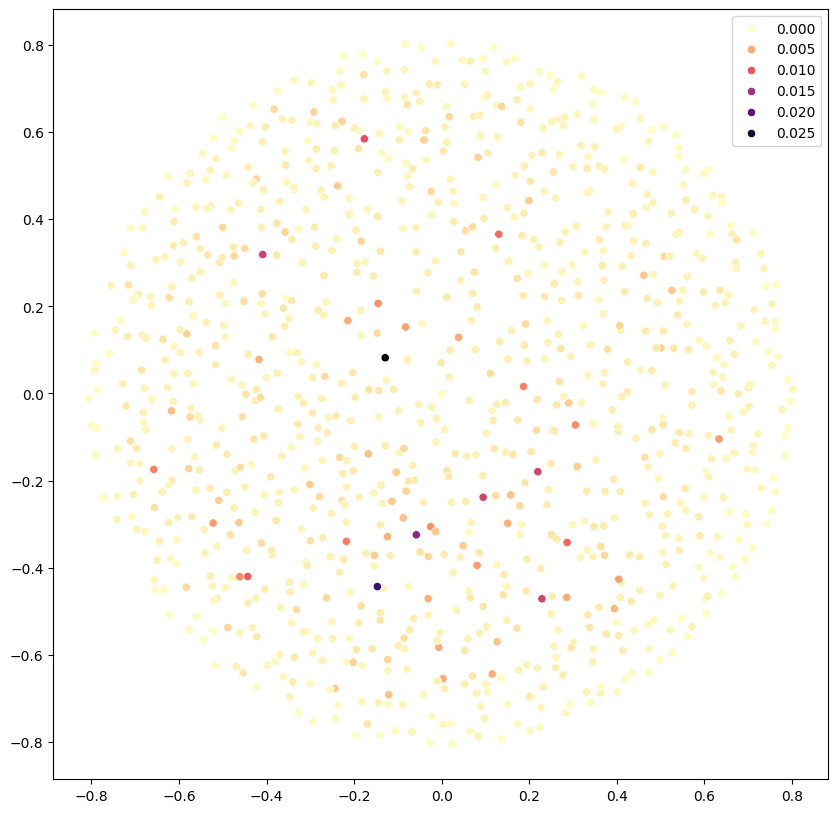

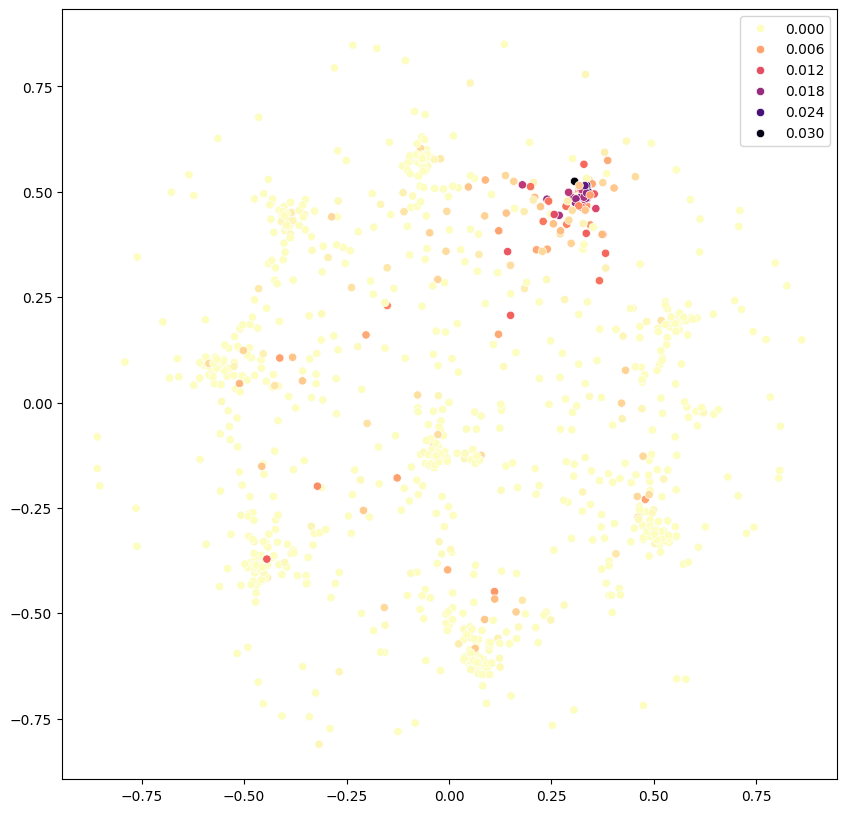

In [10]:
compare_projections(DataType.MNIST, "mnist_mlp", n_layer=4, label=0, size=2000)

We can see activation of neurons represented in a close proximity. This indicates that features coresponding to the class that they detect are present in the data.

## DISCRIMINATIVE NEURON MAP

For discriminative neuron map for the test subsets we use last hidden layer activations, after training. The presence of compact visual clusters shows how the entire set of neurons can be (almost) partitioned into groups with related discriminative roles (specializations),
even though the neuron projection is created without any class information. The activation and neuron projections can be combined to elucidate the role of particular neurons.


TODO: Utilize the `compare_discriminative_map` method to generate a discriminative neuron maps for both `mnist_mlp` and `mnist_cnn`. What observations can be made?

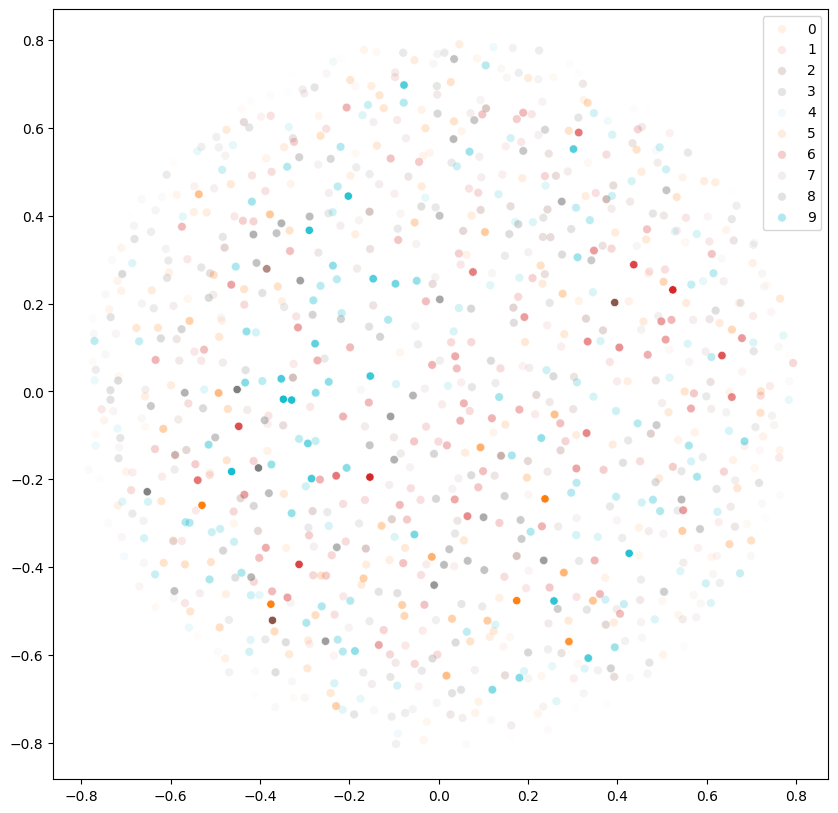

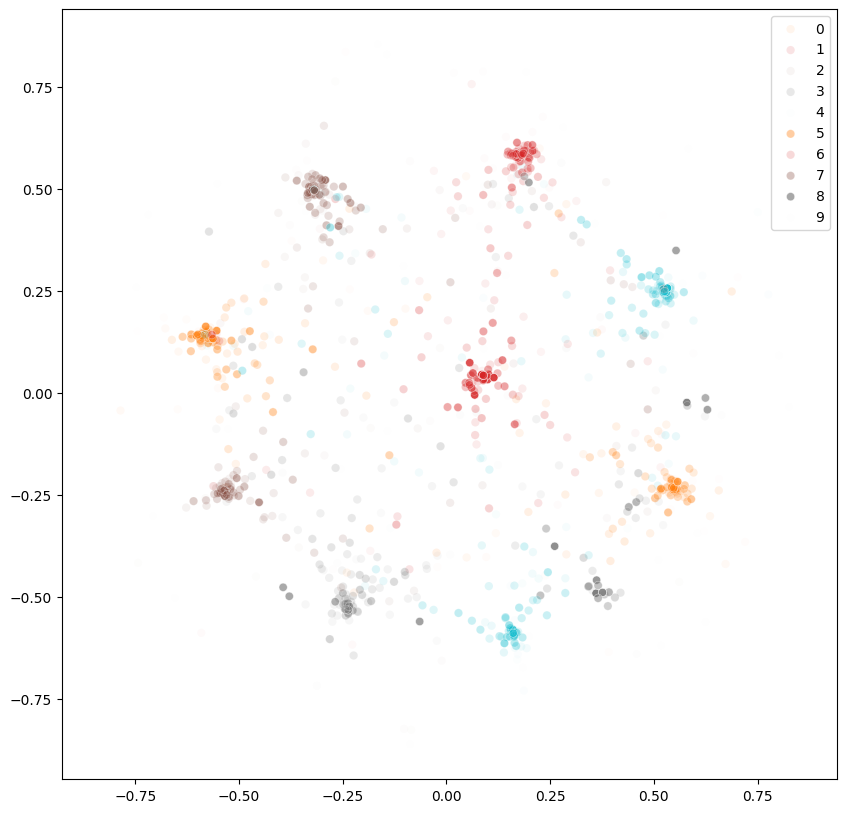

In [11]:
compare_discriminative_map(DataType.MNIST, "mnist_mlp", 4, 2000)

We compare neurons before and after the training. It's easy to notice that after the training, the neurons that correspond to a given class are in closer proximity to one another than to neurons that detect other classes.